## Problem Statement:
A organization has asked you to draw meaningful insights from 2 years of data & provide brief details based on the monetary value, frequency of buy, etc.


## Objective:
Build an unsupervised learning model which can enable your company to analyze their customers via RFM (Recency, Frequency and Monetary value) approach.
We also need to create customer segments, also provide business insights on the basis of clusters.


### Importing Basic Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Dataset Overview
537979 transactions found from 24928 Unique Invoices generated

For 381 unique days of transaction from 02nd of Dec 2016 to 19th of Dec 2017.

Transacted by 4349 unique customers.

For 3898 unique items shipped from 21 unique locations of total transactions value of INR 116.27 cr.


In [2]:
df = pd.read_excel('E-com_Data.xlsx')

In [3]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Time(Hour)
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN,15
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN,14
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN,14
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN,14
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN,14


## Variables Overview 

We have around 12 Variables

Datatypes found are:

FLOAT : Customer ID, Price per Unit, Price, Cancelled Status

OBJECT : Item Code, Time, Shipping Location, Reason of return

INTEGER : Invoice No., Quantity

DATE & TIME : Date of Purchase

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
 12  Time(Hour)         537979 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(3), 

In [5]:
df.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        3479
Price                16327
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
Time(Hour)              15
dtype: int64

In [6]:
df.isnull().sum()

CustomerID           133790
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529634
Reason of return     537976
Sold as set          537979
Time(Hour)                0
dtype: int64

## Attributes Study

### Customer ID

404189 Non Blank rows

4349 unique Customer Ids

Relevant attributes RFM values has to be calculated for each customer for further analysis

25.3% Customer ID’s are missing no insights actionable.

Drop observations related to blank customer id’s

### Revenue

Some transactions are making overall revenue for few customers to be negative. 

Negative total revenue suggest that negative Quantity (cancelled/discontinued/Non defined negatives) are more from customers who bought outside time frame of data.

Negative transactions can be converted to 1 or the negatives can be removed.

### Invoice No. & Item Code

Data available for all 537979 rows

3898 unique items are being sold

Item code has no role in RFM analysis but important attribute for decision on data cleaning

### Date of purchase, Time & Shipping Location

Date of purchase has no missing values 

Important attribute for Recency & Frequency Calculation

Data for 381 days of sale between 02 Dec 2016 and 19 Dec 2017

Time of purchase of the item

Shipping Location means where the item is delivered

There are total 20 unique shipping locations

### Quantity & Price Per unit

No missing value

It has negative values 

The negatives values meant that there are discounts and cancellation

The negative values are from past data which are not part of the data provided

### Cancelled status, Reason of Return & sold as set

These are the transaction specific attributes , helpful in understanding data but no role in RFM calculation

More than 98% data is missing in each case. Hence dropped from final model


In [7]:
# Renaming the columns

df = df.rename(columns = {'InvoieNo':'InvoiceNo', 'Date of purchase':'Date'})
df

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Time(Hour)
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN,15
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN,14
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN,14
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN,14
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
537974,NaN,85194L,372313,2017-03-23,6,09:27:00,198.0,1188.0,Location 8,NaN,NaN,NaN,9
537975,NaN,14693,367605,2017-02-06,2,14:25:00,761.0,1522.0,Location 8,NaN,NaN,NaN,14
537976,NaN,14693,368246,2017-02-06,3,10:40:00,761.0,2283.0,Location 8,NaN,NaN,NaN,10
537977,NaN,85194L,366891,2017-01-29,15,17:05:00,198.0,2970.0,Location 8,NaN,NaN,NaN,17


### There are Duplicate transactions in the dataset, its not required for model building, 
### hence we are dropping them in the next steps

In [8]:
df.loc[df.duplicated(), :]

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Time(Hour)
61202,4043.0,15819,403353,2017-12-02,1,14:07:00,447.0,447.0,Location 36,NaN,NaN,NaN,14
70587,3984.0,15422,405579,2017-12-09,24,14:09:00,77.0,1848.0,Location 36,NaN,NaN,NaN,14
84823,3828.0,14519,398139,2017-10-31,1,14:04:00,85.0,85.0,Location 36,NaN,NaN,NaN,14
120521,3384.0,15121,380588,2017-06-11,1,11:37:00,298.0,298.0,Location 36,NaN,NaN,NaN,11
182786,2607.0,15660,393225,2017-09-30,1,12:31:00,484.0,484.0,Location 36,NaN,NaN,NaN,12
248215,1852.0,15614,382863,2017-07-02,12,09:53:00,221.0,2652.0,Location 36,NaN,NaN,NaN,9
310310,1291.0,13958,368695,2017-02-14,2,16:17:00,298.0,596.0,Location 36,NaN,NaN,NaN,16
325175,1076.0,2020,405755,2017-12-13,12,15:48:00,58.0,696.0,Location 36,NaN,NaN,NaN,15
414854,NaN,2020,386281,2017-07-31,1,17:09:00,104.0,104.0,Location 36,NaN,NaN,NaN,17


In [9]:
df.duplicated().sum()

9

In [10]:
df = df.drop_duplicates(ignore_index = True)

In [11]:
df.isnull().sum()

CustomerID           133789
Item Code                 0
InvoiceNo                 0
Date                      0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529625
Reason of return     537967
Sold as set          537970
Time(Hour)                0
dtype: int64

### Dropping customer ID's because they are above the threshold of missing data

In [12]:
df = df.dropna(subset=['CustomerID'])

In [13]:
df.isnull().sum()

CustomerID                0
Item Code                 0
InvoiceNo                 0
Date                      0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     395998
Reason of return     404181
Sold as set          404181
Time(Hour)                0
dtype: int64

### Converting Date to Datetime format which will used for RFM Model Building

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

### Creating a duplicate Date variable which will used for RFM Model Building

In [15]:
df['Date_1'] = df['Date']

In [16]:
df

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Time(Hour),Date_1
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN,15,2017-10-29
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN,14,2017-10-05
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN,14,2017-10-12
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN,14,2017-08-22
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN,14,2017-10-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537936,37.0,14693,402292,2017-11-28,1,12:07:00,384.0,384.0,Location 8,NaN,NaN,NaN,12,2017-11-28
537937,37.0,14693,402292,2017-11-27,1,12:07:00,398.0,398.0,Location 8,NaN,NaN,NaN,12,2017-11-27
537938,21.0,77618,363890,2016-12-21,8,12:58:00,308.0,2464.0,Location 8,NaN,NaN,NaN,12,2016-12-21
537939,21.0,85194L,363890,2016-12-21,36,12:58:00,113.0,4068.0,Location 8,NaN,NaN,NaN,12,2016-12-21


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404181 non-null  float64       
 1   Item Code          404181 non-null  object        
 2   InvoiceNo          404181 non-null  int64         
 3   Date               404181 non-null  datetime64[ns]
 4   Quantity           404181 non-null  int64         
 5   Time               404181 non-null  object        
 6   price per Unit     404181 non-null  float64       
 7   Price              404181 non-null  float64       
 8   Shipping Location  404181 non-null  object        
 9   Cancelled_status   8183 non-null    float64       
 10  Reason of return   0 non-null       object        
 11  Sold as set        0 non-null       float64       
 12  Time(Hour)         404181 non-null  int64         
 13  Date_1             404181 non-null  datetime

### Building a RFM Table which gives the information the customer's Recent purchase, cumulative Frequency & cumulative Monetory

In [18]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2017,12,20)

#Create RFM Modelling scores for each customer
RFMScores = df.groupby('CustomerID').agg({'Date_1': lambda x: (Latest_Date - x.max()).days, 'Date': lambda x: x.nunique(), 'Price': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['Date'] = RFMScores['Date'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'Date_1': 'Recency', 
                         'Date': 'Frequency', 
                         'Price': 'Monetory'}, inplace=True)

RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,63,553704.0
1,3.0,77,18,257404.0
2,4.0,19,10,176613.0
3,5.0,311,7,41976.0
4,6.0,37,42,151822.0


In [19]:
#Descriptive Statistics (Recency)
RFMScores.Recency.describe()

count    4349.000000
mean       93.299379
std       100.701315
min         1.000000
25%        18.000000
50%        51.000000
75%       144.000000
max       381.000000
Name: Recency, dtype: float64

In [20]:
#Descriptive Statistics (Frequency)
RFMScores.Frequency.describe()

count    4349.000000
mean       27.396643
std        33.594882
min         1.000000
25%         9.000000
50%        16.000000
75%        33.000000
max       378.000000
Name: Frequency, dtype: float64

In [21]:
#Descriptive Statistics (Monetary)
RFMScores.Monetory.describe()

count    4.349000e+03
mean     2.299380e+05
std      8.572589e+05
min     -5.037200e+04
25%      3.814800e+04
50%      8.365500e+04
75%      2.056120e+05
max      3.553619e+07
Name: Monetory, dtype: float64

In [22]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [23]:
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 9.0, 0.5: 16.0, 0.75: 33.0},
 'Monetory': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [24]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

### Assigning R-Score, F-Score, M-Score to RFM Table with being highest & 4 being lowest score

In [25]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetory'].apply(FnMScoring, args=('Monetory',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetory,R,F,M
CustomerID,,,,,,
2.0,4,63,553704.0,1,1,1
3.0,77,18,257404.0,3,2,1
4.0,19,10,176613.0,2,3,2
5.0,311,7,41976.0,4,4,3
6.0,37,42,151822.0,2,1,2


### Grouping R-Score, F-Score, M-Score to RFM Group and then adding them to create a RFM Score for a customer

In [26]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
2.0,4,63,553704.0,1,1,1,111,3
3.0,77,18,257404.0,3,2,1,321,6
4.0,19,10,176613.0,2,3,2,232,7
5.0,311,7,41976.0,4,4,3,443,11
6.0,37,42,151822.0,2,1,2,212,5


### Assigning loyalty levels to customer on the basis of RFM Score

In [27]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Diamond','Platinum', 'Gold','Silver']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,2.0,4,63,553704.0,1,1,1,111,3,Diamond
1,3.0,77,18,257404.0,3,2,1,321,6,Platinum
2,4.0,19,10,176613.0,2,3,2,232,7,Platinum
3,5.0,311,7,41976.0,4,4,3,443,11,Silver
4,6.0,37,42,151822.0,2,1,2,212,5,Diamond


In [28]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetory', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,1704.0,3,235,35536194.0,1,1,1,111,3,Diamond
1,1896.0,2,356,17743855.0,1,1,1,111,3,Diamond
2,1346.0,10,237,12647317.0,1,1,1,111,3,Diamond
3,3802.0,3,236,12319439.0,1,1,1,111,3,Diamond
4,4234.0,3,94,10654918.0,1,1,1,111,3,Diamond
5,1006.0,5,211,9351019.0,1,1,1,111,3,Diamond
6,3203.0,5,99,8102167.0,1,1,1,111,3,Diamond
7,2193.0,1,357,7966054.0,1,1,1,111,3,Diamond
8,1448.0,5,190,7892625.0,1,1,1,111,3,Diamond
9,3759.0,10,112,7545149.0,1,1,1,111,3,Diamond


In [29]:
RFMScores=RFMScores.reset_index()

In [30]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetory'] = [handle_neg_n_zero(x) for x in RFMScores.Monetory]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetory']].apply(np.log, axis = 1).round(3)

In [31]:
Log_Tfd_Data

,Recency,Frequency,Monetory
0,1.386,4.143,13.224
1,4.344,2.890,12.458
2,2.944,2.303,12.082
3,5.740,1.946,10.645
4,3.611,3.738,11.930
...,...,...,...
4344,5.628,1.946,9.927
4345,5.198,1.792,9.285
4346,2.197,2.398,10.125
4347,1.386,4.883,12.545


In [32]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

### Using Elbow Method to find out the ideal number of clusters

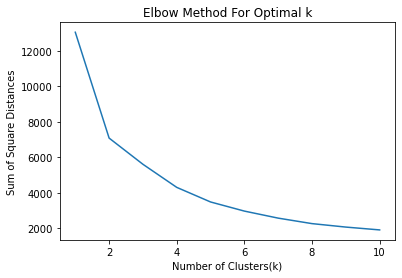

In [33]:
# To find the best K (cluster) by the help of Elbow method

from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    kMeans = KMeans(n_clusters=i, init='k-means++')
    kMeans.fit(Scaled_Data)
    wcss.append(kMeans.inertia_)
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Observation: The ideal number of cluster are '4'

In [34]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
#KMean_clust.fit(Scaled_Data)
y_kmeans = KMean_clust.fit_predict(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()

,CustomerID,Recency,Frequency,Monetory,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
0,2.0,4,63,553704.0,1,1,1,111,3,Diamond,3
1,3.0,77,18,257404.0,3,2,1,321,6,Platinum,1
2,4.0,19,10,176613.0,2,3,2,232,7,Platinum,1
3,5.0,311,7,41976.0,4,4,3,443,11,Silver,0
4,6.0,37,42,151822.0,2,1,2,212,5,Diamond,1


In [35]:
y_kmeans

array([3, 1, 1, ..., 1, 3, 1])

### Finding out the number of customers contributing to each cluster on the basis of Recency, Frequency, Monetory

In [36]:
# look at the centroids per cluster
centroid_df = RFMScores.groupby('Cluster')[['Recency', 'Frequency', 'Monetory','CustomerID']].agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetory':'mean','CustomerID':'nunique'}).reset_index()
centroid_df = centroid_df.rename(columns = {'CustomerID':'NumBuyers'})
centroid_df['Percent'] = round(centroid_df['NumBuyers']/centroid_df.NumBuyers.sum()*100,2)
centroid_df

,Cluster,Recency,Frequency,Monetory,NumBuyers,Percent
0,0,179.305296,7.955763,41008.495327,1605,36.91
1,1,55.882656,22.127647,140504.323469,1747,40.17
2,2,251.225806,3.645161,4.064516,31,0.71
3,3,13.001035,69.988613,713178.390269,966,22.21


### Finding out the number of customers contributing to each Loyalty Level on the basis of Recency, Frequency, Monetory

In [37]:
centroid_df_1 = RFMScores.groupby('RFM_Loyalty_Level')[['Recency', 'Frequency', 'Monetory','CustomerID']].agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetory':'sum','CustomerID':'nunique'}).reset_index()
centroid_df_1 = centroid_df_1.rename(columns = {'CustomerID':'NumBuyers'})
centroid_df_1['Percent'] = round(centroid_df_1['NumBuyers']/centroid_df_1.NumBuyers.sum()*100,2)
centroid_df_1

,RFM_Loyalty_Level,Recency,Frequency,Monetory,NumBuyers,Percent
0,Diamond,20.096273,61.369565,766373539.0,1288,29.62
1,Platinum,63.024238,20.006255,163027057.0,1279,29.41
2,Gold,113.329670,9.743956,48539048.1,910,20.92
3,Silver,224.927752,6.478211,22270495.0,872,20.05


In [38]:
df_1 = pd.read_excel('E-com_Data.xlsx')

### Plotting the hourly unit sales

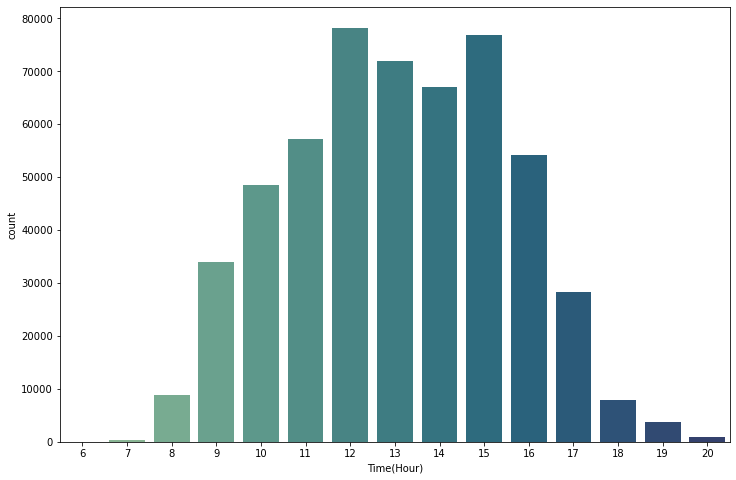

In [39]:
plt.figure(figsize=(12,8))
sns.countplot(df_1['Time(Hour)'],palette='crest')
plt.show()

### Observation: The peak hours are from 12pm-4pm

### Plotting the hourly sales

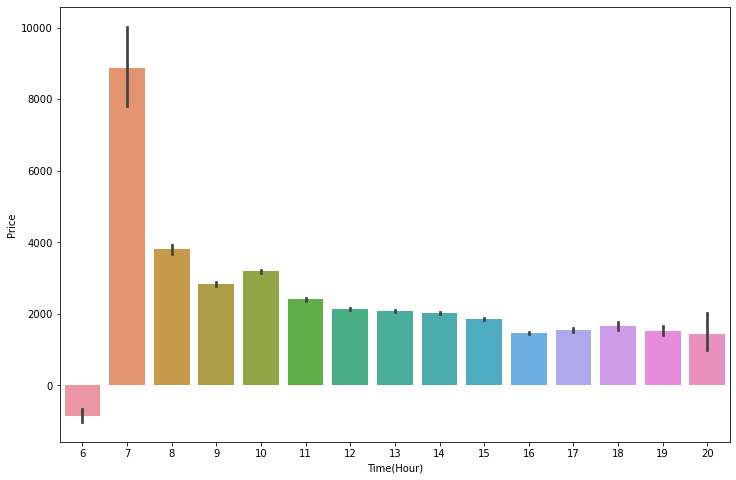

In [40]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Time(Hour)', y='Price', data = df_1)
plt.show()

### Observation: The peak sales happen from 7am to 8am

### Plotting Bars for clusters on the basis of Recency
### Observation: Cluster 3 is the best & cluster 0 & 2 are the worst

<AxesSubplot:xlabel='Cluster', ylabel='Recency'>

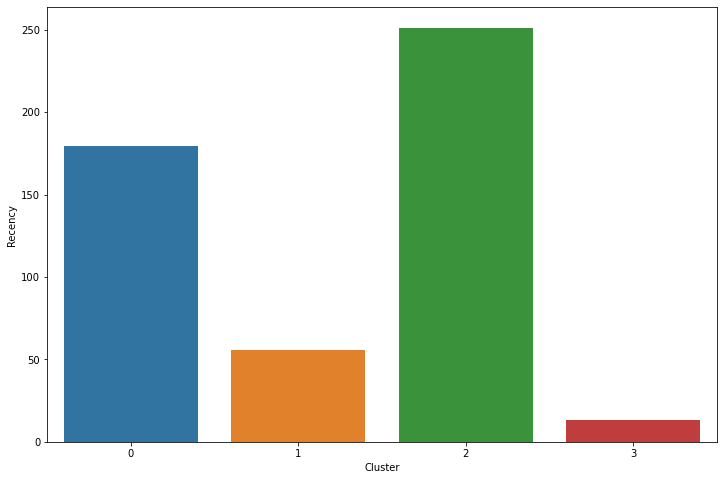

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Cluster', y='Recency', data = centroid_df)

### Plotting Bars for clusters on the basis of Frequency
### Observation: Cluster 3 is the best, cluster 0 & 2 are the worst

<AxesSubplot:xlabel='Cluster', ylabel='Frequency'>

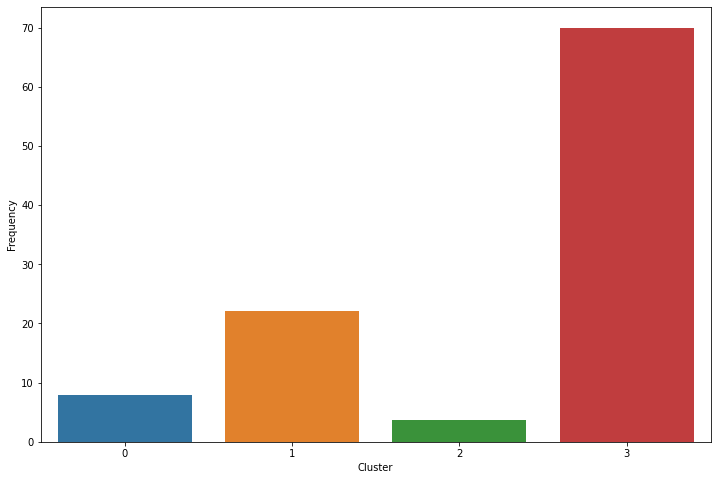

In [42]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Cluster', y='Frequency', data = centroid_df)

### Plotting Bars for clusters on the basis of Monetory
### Observation: Cluster 3 is the best & cluster 0 & 2 are the worst

<AxesSubplot:xlabel='Cluster', ylabel='Monetory'>

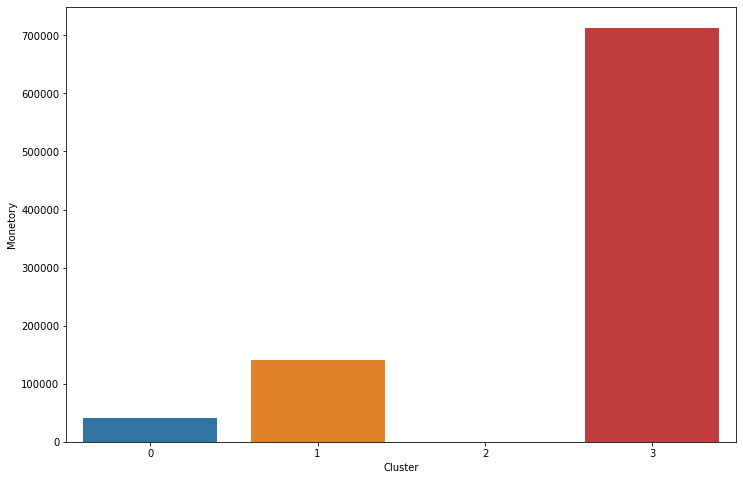

In [43]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Cluster', y='Monetory', data = centroid_df)

### Plotting Pie charts for number of buyers contributing to each cluster
### Observation: 

Cluster 3(best cluster) contributes 22.3%

Cluster 0 & 2(worst clusters) contributes 36.9% & 0.7% respectively

([<matplotlib.patches.Wedge at 0x27eb14c4d30>,
 [Text(-1.0082222606019486, 0.439872564757904, '0'),
  Text(0.46773878575603584, -0.9956005365102358, '1'),
  Text(1.0871867503050276, 0.16740660070975, '2'),
  Text(0.706795806957929, 0.8428758433284764, '3')],
 [Text(-0.5499394148737902, 0.23993048986794757, '36.9%'),
  Text(0.25513024677601953, -0.5430548380964922, '40.2%'),
  Text(0.5930109547118332, 0.09131269129622725, '0.7%'),
  Text(0.38552498561341575, 0.4597504599973507, '22.2%')])

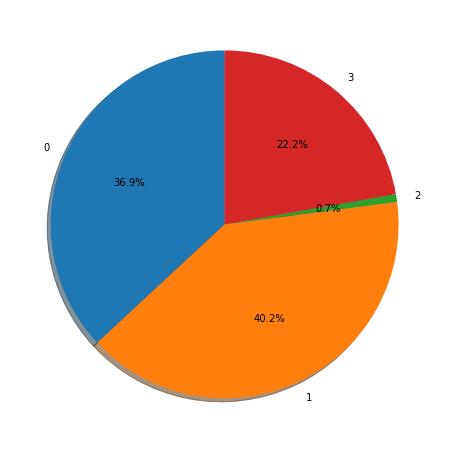

In [44]:
labels = centroid_df['Cluster']
sizes = centroid_df['NumBuyers']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

### Plotting Pie charts for number of buyers contributing to each RFM Loyalty level
### Observation: 
Diamond(best RFM Loyalty level) contributes 29.4%

Silver(worst RFM Loyalty level) contributes 20.1%

([<matplotlib.patches.Wedge at 0x27eb4a81c10>,
 [Text(-0.8820542530746224, 0.6572520784546597, 'Diamond'),
  Text(-0.38425826139132757, -1.0307015031290652, 'Platinum'),
  Text(1.0346697640101794, -0.3734414002800436, 'Gold'),
  Text(0.6479771626350961, 0.8888900925892753, 'Silver')],
 [Text(-0.4811205016770667, 0.35850113370254166, '29.6%'),
  Text(-0.20959541530436046, -0.562200819888581, '29.4%'),
  Text(0.5643653258237342, -0.2036953092436601, '20.9%'),
  Text(0.35344208871005234, 0.48484914141233193, '20.1%')])

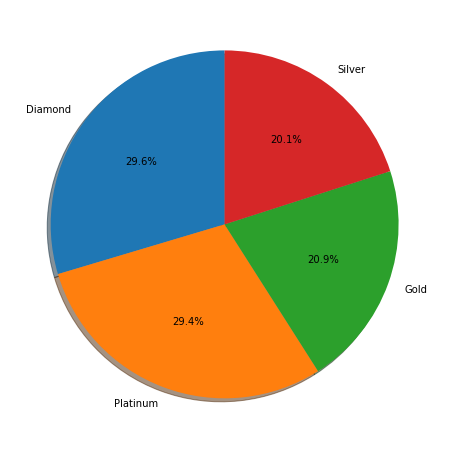

In [45]:
labels = centroid_df_1['RFM_Loyalty_Level']
sizes = centroid_df_1['NumBuyers']
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

### Plotting Bars to find out which Shipping Location contributes maximum sales
### Observation: 
Location 37,Location 4,Location 7 are top 3

Location 24,Location 21,Location 23 are bottom 3

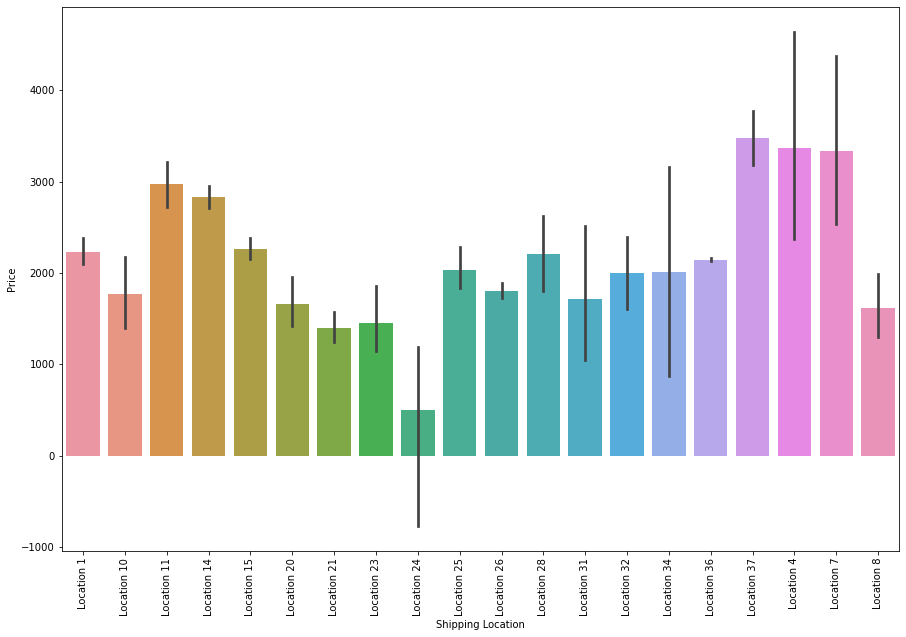

In [46]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Shipping Location", y="Price", data=df_1)
plt.xticks(rotation=90)
plt.show()

### Business Insights

Cluster 3(Best Cluster): Customers in this cluster spend the most, market them high priced products, so that there is increase in high value product sales

Cluster 1(Moderate Cluster) Customers in this cluster are 2nd best in RFM, market them moderate priced products so there is increase in unit based sales

Cluster 0 & 2 (Worst clusters) Customers in this cluster are worst, marketing team needs to find out why they are not shopping, customer support team needs to help them solve their queries